# HDDM on 15 MD and 20 TD Similarity

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm
import warnings
warnings.filterwarnings('ignore')

## Prepare our data

In [6]:
data = hddm.load_csv('15md_10td_responses.csv')
data = data.rename(columns={'ACC':'response','Subject':'subj_idx','RT':'rt'})
data.rt = data.rt/1000
data = data[data.rt != 0]
data.head()

,subj_idx,Group,response,rt,Condition
0,39,MD,1,1.524,Add
1,39,MD,1,1.161,Add
2,39,MD,1,1.927,Add
3,39,MD,1,1.496,Add
4,39,MD,1,2.098,Control


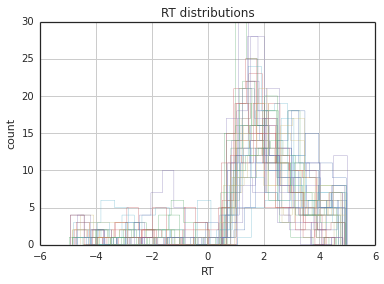

In [7]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

## Run model with parameters dependent upon group and condition

In [89]:
m = hddm.HDDM(data,depends_on={'v':['Group','Condition'],
                               'a':['Group','Condition'],
                               't':['Group','Condition']})
m.find_starting_values()
m.sample(5000, burn=500, dbname='traces.db', db='pickle')
m.save('15md_20td_hddm')

 [-----------------100%-----------------] 5001 of 5000 complete in 4014.4 sec

In [97]:
stats = m.gen_stats()
stats.to_csv('15md_20td_hddm_summary_stats.csv')

Plotting a(Add.MD)
Plotting a(Add.TD)
Plotting a(Control.MD)
Plotting a(Control.TD)
Plotting a(Sub.MD)
Plotting a(Sub.TD)
Plotting a_std
Plotting v(Add.MD)
Plotting v(Add.TD)
Plotting v(Control.MD)
Plotting v(Control.TD)
Plotting v(Sub.MD)
Plotting v(Sub.TD)
Plotting v_std
Plotting t(Add.MD)
Plotting t(Add.TD)
Plotting t(Control.MD)
Plotting t(Control.TD)
Plotting t(Sub.MD)
Plotting t(Sub.TD)
Plotting t_std


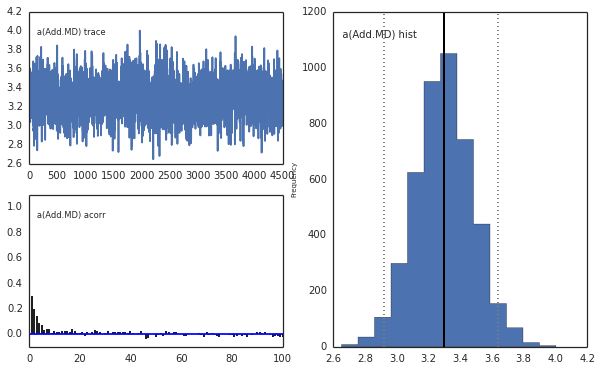

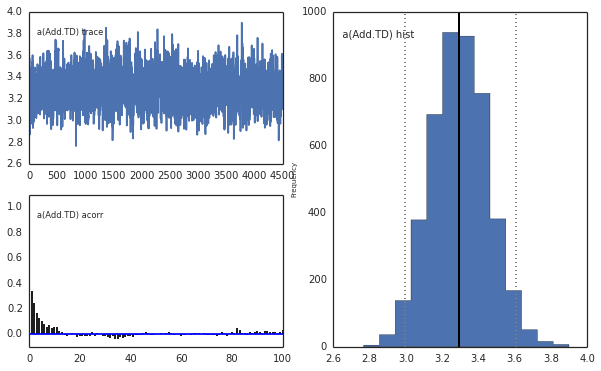

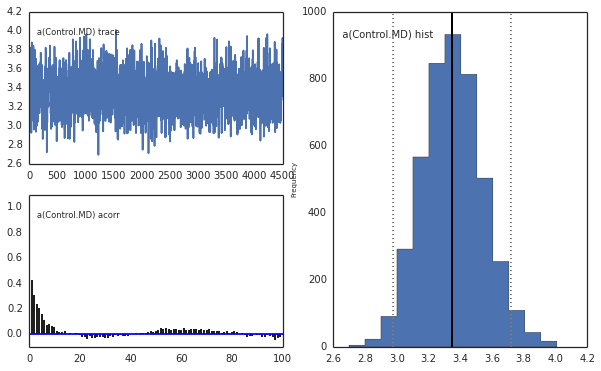

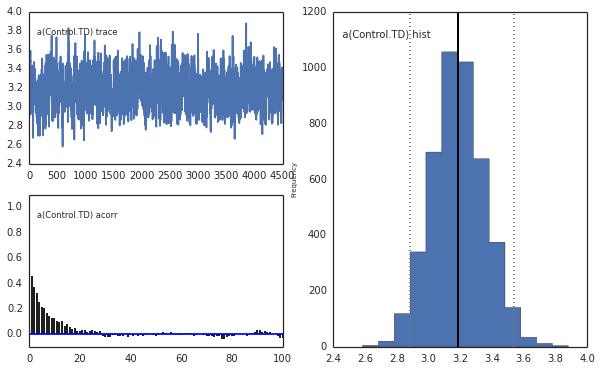

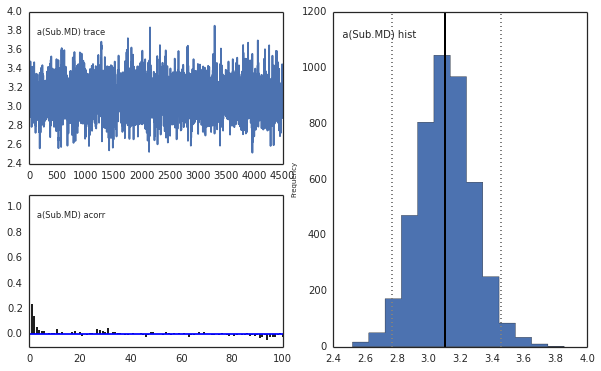

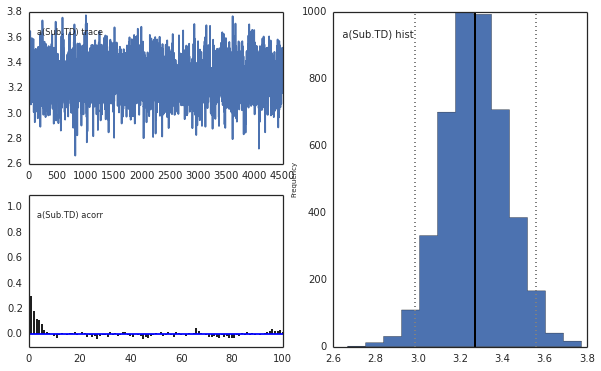

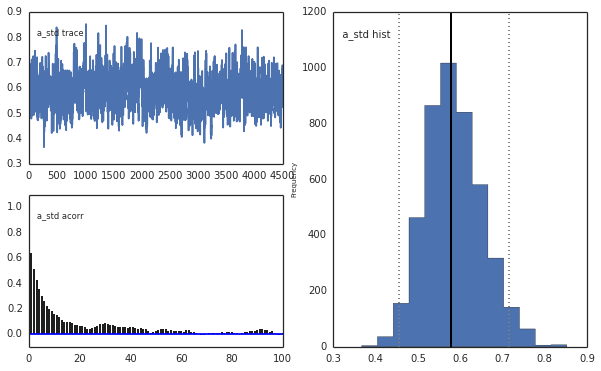

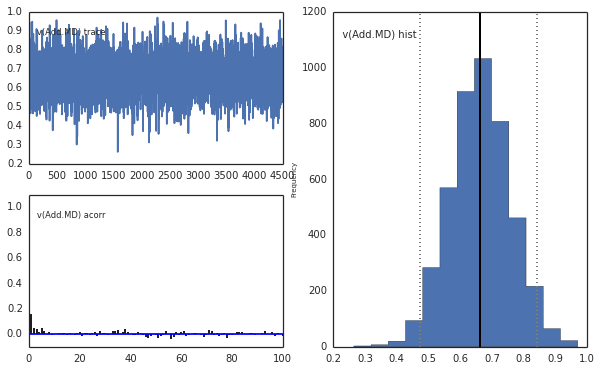

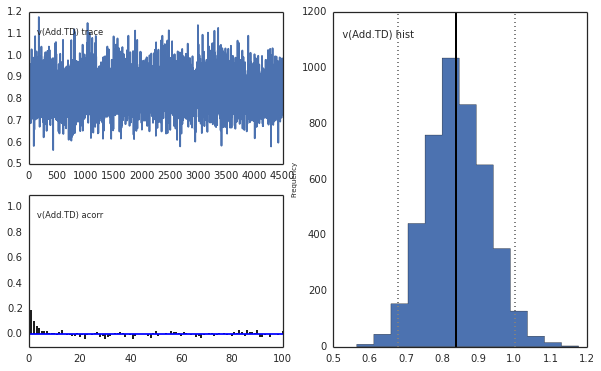

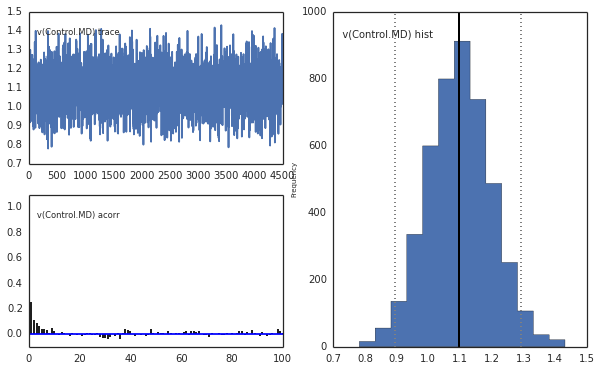

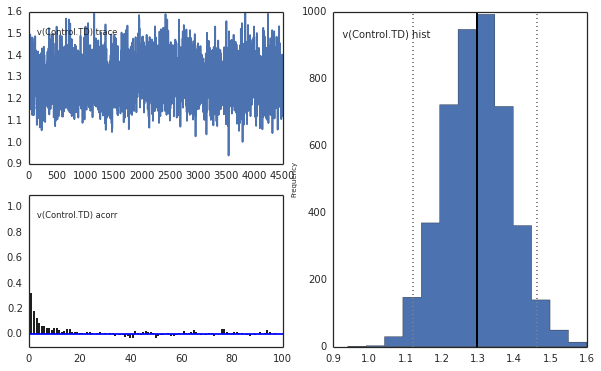

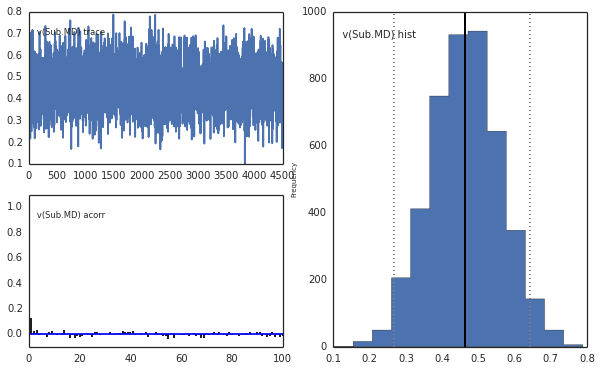

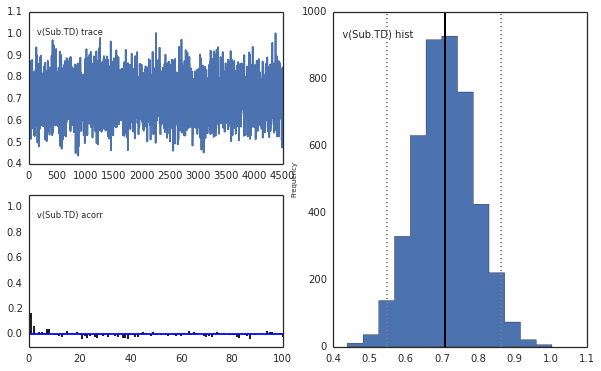

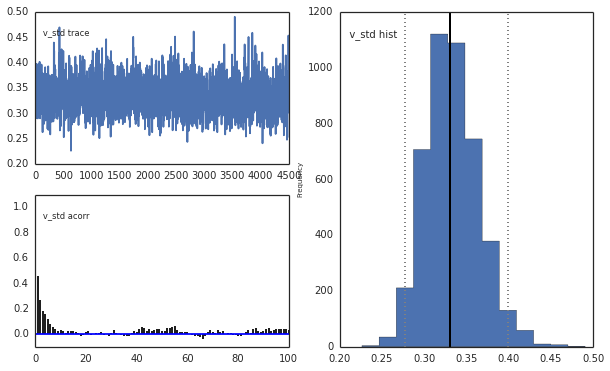

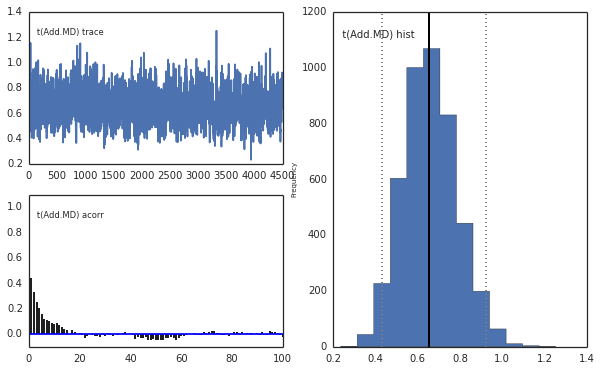

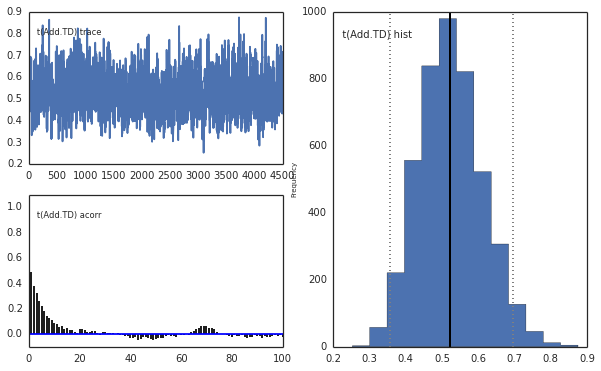

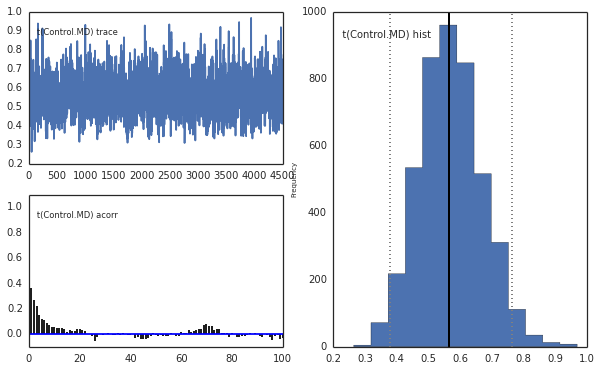

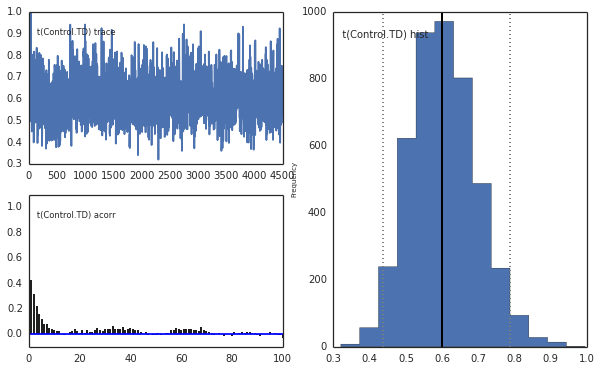

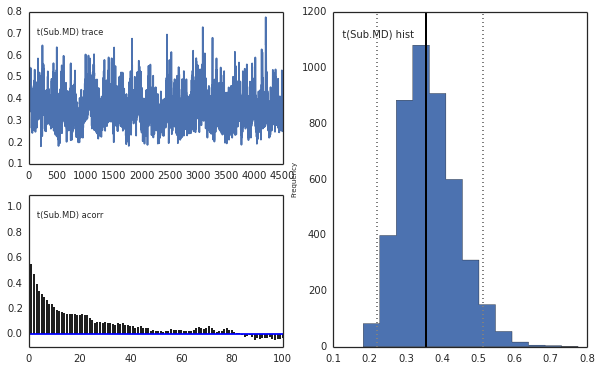

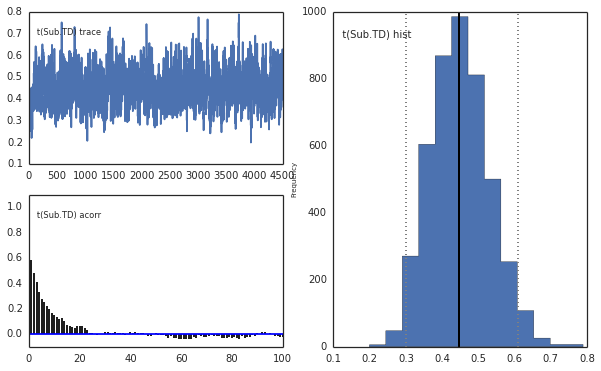

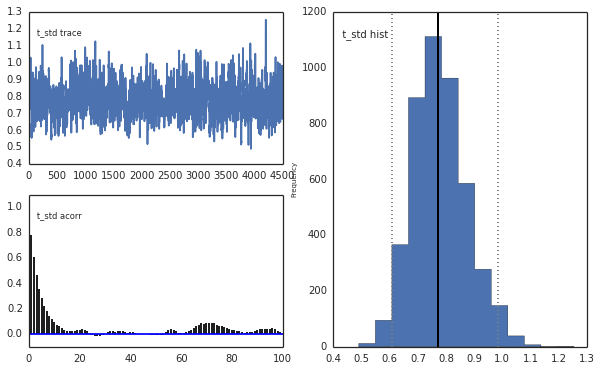

In [93]:
m.plot_posteriors()

P(Control.TD > Control.MD) =  0.930666666667
P(Add.TD > Add.MD) =  0.926444444444
P(Sub.TD > Sub.MD) =  0.972666666667


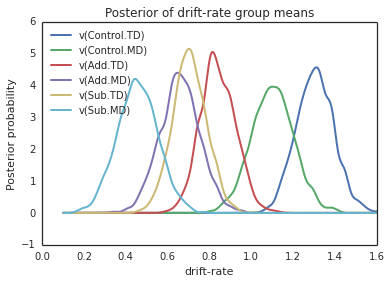

In [90]:
drift_vars = m.nodes_db.node[['v(Control.TD)', 'v(Control.MD)',
                              'v(Add.TD)', 'v(Add.MD)',
                              'v(Sub.TD)', 'v(Sub.MD)']]
hddm.analyze.plot_posterior_nodes(drift_vars)
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(Control.TD > Control.MD) = ", (drift_vars[0].trace() > drift_vars[1].trace()).mean()
print "P(Add.TD > Add.MD) = ", (drift_vars[2].trace() > drift_vars[3].trace()).mean()
print "P(Sub.TD > Sub.MD) = ", (drift_vars[4].trace() > drift_vars[5].trace()).mean()

P(Control.TD > Control.MD) =  0.252222222222
P(Add.TD > Add.MD) =  0.501555555556
P(Sub.TD > Sub.MD) =  0.763555555556


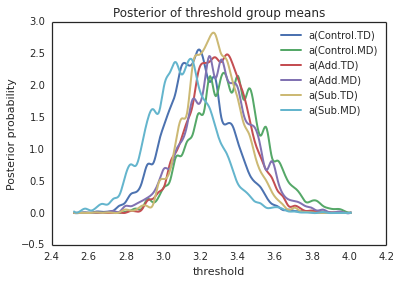

In [91]:
thresh_vars = m.nodes_db.node[['a(Control.TD)', 'a(Control.MD)',
                              'a(Add.TD)', 'a(Add.MD)',
                              'a(Sub.TD)', 'a(Sub.MD)']]
hddm.analyze.plot_posterior_nodes(thresh_vars)
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print "P(Control.TD > Control.MD) = ", (thresh_vars[0].trace() > thresh_vars[1].trace()).mean()
print "P(Add.TD > Add.MD) = ", (thresh_vars[2].trace() > thresh_vars[3].trace()).mean()
print "P(Sub.TD > Sub.MD) = ", (thresh_vars[4].trace() > thresh_vars[5].trace()).mean()

P(Control.TD > Control.MD) =  0.611111111111
P(Add.TD > Add.MD) =  0.161111111111
P(Sub.TD > Sub.MD) =  0.818


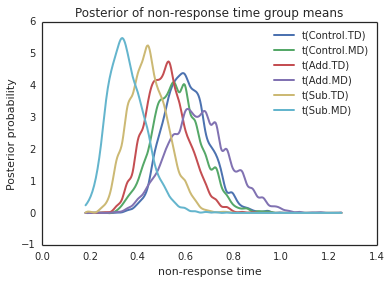

In [92]:
non_vars = m.nodes_db.node[['t(Control.TD)', 't(Control.MD)',
                              't(Add.TD)', 't(Add.MD)',
                              't(Sub.TD)', 't(Sub.MD)']]
hddm.analyze.plot_posterior_nodes(non_vars)
plt.xlabel('non-response time')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-response time group means')

print "P(Control.TD > Control.MD) = ", (non_vars[0].trace() > non_vars[1].trace()).mean()
print "P(Add.TD > Add.MD) = ", (non_vars[2].trace() > non_vars[3].trace()).mean()
print "P(Sub.TD > Sub.MD) = ", (non_vars[4].trace() > non_vars[5].trace()).mean()